## 1. Imports and Model Loading

In [2]:
import os

# os.chdir("sam-3d-objects/notebook")
os.getcwd()

'/d/hpc/home/jn16867/cso/sam-3d-objects'

In [3]:
import os
import uuid
import imageio
import numpy as np
from IPython.display import Image as ImageDisplay
# import inference

In [4]:
PATH = os.getcwd()
TAG = "hf"

In [ ]:
# config_path = f"{PATH}/../checkpoints/{TAG}/pipeline.yaml"
# model_inference = inference.Inference(config_path, compile=False)

2026-01-28 10:42:50.850 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 
/d/hpc/home/jn16867/.conda/envs/sam3d-objects/lib/python3.11/site-packages/moge/model/v1.py:171: UserWarning: The following deprecated/invalid arguments are ignored: {'output_mask': True, 'split_head': True}
  warnings.warn(f"The following deprecated/invalid arguments are ignored: {deprecated_kwargs}")
2026-01-28 10:43:07.439 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 
2026-01-28 10:43:07.441 | INFO     | sam3d_objects.pipeline.inference_pipeline:__init__:100 - self.device: cuda
2026-01-28 10:43:07.442 | INFO     | sam3d_objects.pipeline.inference_pipeline:__init__:101 - CUDA_VISIBLE_DEVICES: 0,1
2026-01-28 10:43:07.442 | INFO     | sam3d_objects.pipeline.inference_pipeline:__init__:102 - Actually using GPU: 0
2026-01-28 10:43:07.443 | INFO

## 2. Load input image to lift to 3D (multiple objects)

loading masks
/d/hpc/home/jn16867/cso/sam-3d-objects/notebook/images/pasta/0.png
/d/hpc/home/jn16867/cso/sam-3d-objects/notebook/images/pasta/1.png


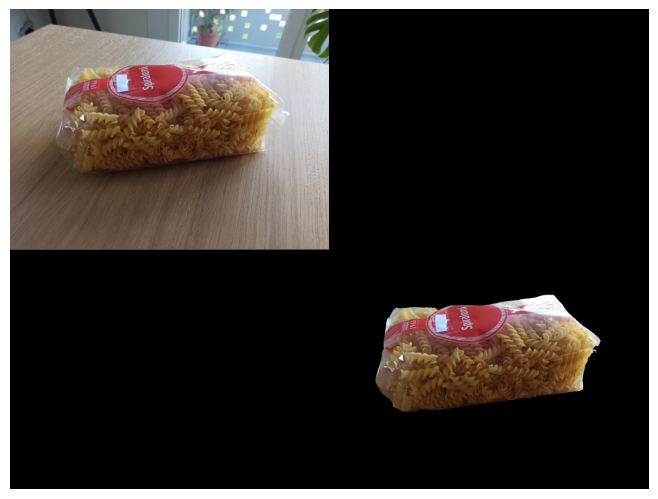

In [ ]:
import importlib
importlib.reload(inference)

# IMAGE_PATH = f"{PATH}/images/pasta/image.jpg"
# IMAGE_NAME = os.path.basename(os.path.dirname(IMAGE_PATH))
# image = inference.load_image(IMAGE_PATH)
# masks = inference.load_masks(os.path.dirname(IMAGE_PATH), extension=".png")
# inference.display_image(image, masks)

In [26]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()

In [7]:
os.environ["LIDRA_SKIP_INIT"] = "true"

from pathlib import Path
from sam3d_objects.pipeline.inference_with_embeddings import InferenceWithEmbeddings
from sam3d_objects.data.precompute_embeddings import preprocess_sample


config_path = f"{PATH}/../checkpoints/{TAG}/pipeline.yaml"

data_dir = Path("../../3d-counting/data/Stacks-3D-Real/scenes/")

pipeline = InferenceWithEmbeddings(config_path, compile=False)


2026-02-02 18:49:22.886 | INFO     | sam3d_objects.pipeline.inference_pipeline:set_attention_backend:17 - GPU name is Tesla V100S-PCIE-32GB


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


2026-02-02 18:51:19.241 | INFO     | sam3d_objects.model.backbone.tdfy_dit.modules.sparse:__from_env:39 - [SPARSE] Backend: spconv, Attention: sdpa
2026-02-02 18:51:34.894 | INFO     | sam3d_objects.model.backbone.tdfy_dit.modules.attention:__from_env:30 - [ATTENTION] Using backend: sdpa


[SPARSE][CONV] spconv algo: auto
Warp 1.11.0 initialized:
   CUDA Toolkit 12.9, Driver 13.0
   Devices:
     "cpu"      : "x86_64"
     "cuda:0"   : "Tesla V100S-PCIE-32GB" (32 GiB, sm_70, mempool enabled)
     "cuda:1"   : "Tesla V100S-PCIE-32GB" (32 GiB, sm_70, mempool enabled)
   CUDA peer access:
     Supported fully (all-directional)
   Kernel cache:
     /d/hpc/home/jn16867/.cache/warp/1.11.0


2026-02-02 18:52:56.078 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 
2026-02-02 18:52:56.080 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 


FileNotFoundError: [Errno 2] No such file or directory: '/d/hpc/home/jn16867/cso/checkpoints/hf/pipeline.yaml'

In [ ]:
for category_dir in sorted(data_dir.iterdir()):
    if (category_dir / "geco2_mask" / "mask.png").exists():
        preprocess_sample(category_dir, pipeline)

2026-01-29 10:40:49.186 | INFO     | sam3d_objects.pipeline.inference_pipeline:merge_image_and_mask:584 - Replacing alpha channel with the provided mask
2026-01-29 10:40:55.686 | INFO     | sam3d_objects.pipeline.inference_pipeline:get_condition_input:633 - Running condition embedder ...
2026-01-29 10:40:56.297 | INFO     | sam3d_objects.pipeline.inference_pipeline:get_condition_input:637 - Condition embedder finishes!


KeyboardInterrupt: 

In [30]:
from sam3d_objects.data.pasta_count_dataset import PastaCountDataset

dataset = PastaCountDataset(data_dir)
dataset[0]

{'container_outputs': {'6drotation_normalized': tensor([[[ 1.5797, -0.3199, -0.0034, -0.3660, -1.4438,  0.5134]]]),
  'scale': tensor([[2.4257, 2.4257, 2.4257]]),
  'shape': tensor([[[-0.5450,  1.1414,  0.5638,  ..., -0.2811,  0.0401, -0.7011],
           [-1.3345, -0.0761,  0.9307,  ..., -0.6627, -0.2020,  0.0777],
           [-1.5170, -0.7893,  0.0829,  ...,  0.6285, -0.0840, -1.5363],
           ...,
           [-0.6276,  0.8192, -0.4035,  ..., -1.0076, -1.0740,  1.2488],
           [-0.0229,  1.1657, -0.6796,  ...,  1.8195, -0.0805, -0.7656],
           [ 0.4851, -0.2392, -0.8756,  ..., -0.1958, -0.2777,  0.3430]]]),
  'translation': tensor([[-0.0410,  0.1310,  0.3427]]),
  'translation_scale': tensor([[[0.0835]]]),
  'coords_original': tensor([[ 0,  0, 20, 32],
          [ 0,  0, 21, 32],
          [ 0,  0, 22, 31],
          ...,
          [ 0, 63, 44, 34],
          [ 0, 63, 44, 35],
          [ 0, 63, 44, 36]], dtype=torch.int32),
  'shape_latent': tensor([[[-0.5450,  1.1414,  

In [36]:
import torch
from torch.utils.data import DataLoader

# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size

train_size = 1
val_size = 0

train_dataset, val_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size]
)

train_loader = DataLoader(
    train_dataset,
    batch_size=1,
    shuffle=True,
    num_workers=0,
    pin_memory=True,
    collate_fn=lambda x: x[0]
)

val_loader = DataLoader(
    val_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
    collate_fn=lambda x: x[0]
)


/d/hpc/home/jn16867/.conda/envs/sam3d-objects/lib/python3.11/site-packages/torch/utils/data/dataset.py:473: UserWarning: Length of split at index 1 is 0. This might result in an empty dataset.
  warnings.warn(


In [38]:
from tqdm import tqdm
from sam3d_objects.pipeline.inference_with_embeddings import extract_geometric_features, compute_geometric_count_estimate
from sam3d_objects.pipeline.sam3d_count_predictor import SAM3DCountPredictor
import torch.nn as nn

device = "cuda"
num_epochs = 10
lr = 1e-3
output_dir = Path("model_checkpoints/pasta/")

use_hybrid = False
model = SAM3DCountPredictor(use_hybrid=use_hybrid).to(device)
    
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

mse_loss = nn.MSELoss()
l1_loss = nn.L1Loss()

best_val_mae = float('inf')

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_mae = 0
    
    print(f"\nEpoch {epoch + 1}/{num_epochs} - Training...")
    
    for samle in tqdm(train_loader):
        container_out = sample['container_outputs']
        object_out = sample['object_outputs']
        true_count = torch.tensor([sample['true_count']], dtype=torch.float32).to(device)
        
        shape_latent_container = container_out['shape_latent'].to(device)
        shape_latent_object = object_out['shape_latent'].to(device)
            
        slat_features_container = container_out['slat_features'].to(device)
        slat_features_object = object_out['slat_features'].to(device)
        
        if slat_features_container.dim() == 2:
            slat_features_container = slat_features_container.unsqueeze(0)
        if slat_features_object.dim() == 2:
            slat_features_object = slat_features_object.unsqueeze(0)
        
        geom_feat = extract_geometric_features(container_out, object_out).unsqueeze(0).to(device)
        
        geometric_estimate = torch.tensor(
            [compute_geometric_count_estimate(container_out, object_out, 1.0)],
            dtype=torch.float32
        ).to(device)
        
        if use_hybrid:
            pred_count, correction = model(
                shape_latent_container,
                shape_latent_object,
                slat_features_container,
                slat_features_object,
                geom_feat,
                geometric_estimate
            )
        else:
            pred_count, _ = model(
                shape_latent_container,
                shape_latent_object,
                slat_features_container,
                slat_features_object,
                geom_feat,
                None
            )
            
        loss = 0.5 * mse_loss(pred_count, true_count) + 0.5 * l1_loss(pred_count, true_count)
        
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        
        train_loss += loss.item()
        train_mae += torch.abs(pred_count - true_count).item()
        
        print(f"Train loss at epoch {epoch + 1}: {train_loss}")
        print(f"Train mae at epoch {epoch + 1}: {train_mae}")
    
    scheduler.step()
    
    avg_train_loss = train_loss / len(train_dataset)
    avg_train_mae = train_mae / len(train_dataset)
    
    # Validation
    model.eval()
    val_loss = 0
    val_mae = 0
    
    print("Validating")
    
    if len(val_dataset) > 0:
        with torch.no_grad():
            for sample in tqdm(val_loader):
                container_out = sample['container_outputs']
                object_out = sample['object_outputs']
                true_count = torch.tensor([sample['true_count']], dtype=torch.float32).to(device)
                
                shape_latent_container = container_out['shape_latent'].to(device)
                shape_latent_object = object_out['shape_latent'].to(device)
                    
                slat_features_container = container_out['slat_features'].to(device)
                slat_features_object = object_out['slat_features'].to(device)
                
                if slat_features_container.dim() == 2:
                    slat_features_container = slat_features_container.unsqueeze(0)
                if slat_features_object.dim() == 2:
                    slat_features_object = slat_features_object.unsqueeze(0)
                
                geom_feat = extract_geometric_features(container_out, object_out).unsqueeze(0).to(device)
                
                geometric_estimate = torch.tensor(
                    [compute_geometric_count_estimate(container_out, object_out, 1.0)],
                    dtype=torch.float32
                ).to(device)
                
                pred_count, _ = model(
                    shape_latent_container,
                    shape_latent_object,
                    slat_features_container,
                    slat_features_object,
                    geom_feat,
                    None
                )
                
                loss = 0.5 * mse_loss(pred_count, true_count) + 0.5 * l1_loss(pred_count, true_count)
                
                val_loss += loss
                val_mae += torch.abs(pred_count - true_count).item()
            
            avg_val_loss = val_loss / len(val_dataset)
            avg_val_mae = val_mae / len(val_dataset)
            
            print(f"Epoch {epoch+1}/{num_epochs}")
            print(f"  Train Loss: {avg_train_loss:.4f}, Train MAE: {avg_train_mae:.2f}")
            print(f"  Val Loss: {avg_val_loss:.4f}, Val MAE: {avg_val_mae:.2f}")
            
            if avg_val_mae < best_val_mae:
                best_val_mae = avg_val_mae
                
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': avg_val_mae,
                }, output_dir / 'best_model.pth')
                print(f"  Saved new best model with VAL MAE: {avg_val_mae:.2f}")
            
            if (epoch + 1) % 10 == 0:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                }, output_dir / f"checkpoint_epoch_{epoch+1}.pth")
        
print("\nTraining completed")
print(f"Best Validation MAE: {best_val_mae:.2f}")
            


Epoch 1/10 - Training...


100%|████████████████████████████████████| 1/1 [00:00<00:00,  3.27it/s]


Train loss at epoch 1: 173097.796875
Train mae at epoch 1: 587.8840942382812
Validating

Epoch 2/10 - Training...


100%|████████████████████████████████████| 1/1 [00:00<00:00,  3.28it/s]


Train loss at epoch 2: 172964.484375
Train mae at epoch 2: 587.657470703125
Validating

Epoch 3/10 - Training...


100%|████████████████████████████████████| 1/1 [00:00<00:00,  3.29it/s]


Train loss at epoch 3: 172947.53125
Train mae at epoch 3: 587.628662109375
Validating

Epoch 4/10 - Training...


100%|████████████████████████████████████| 1/1 [00:00<00:00,  3.45it/s]


Train loss at epoch 4: 172767.40625
Train mae at epoch 4: 587.3223266601562
Validating

Epoch 5/10 - Training...


100%|████████████████████████████████████| 1/1 [00:00<00:00,  3.92it/s]


Train loss at epoch 5: 172634.15625
Train mae at epoch 5: 587.0955810546875
Validating

Epoch 6/10 - Training...


100%|████████████████████████████████████| 1/1 [00:00<00:00,  4.49it/s]


Train loss at epoch 6: 172613.4375
Train mae at epoch 6: 587.060302734375
Validating

Epoch 7/10 - Training...


100%|████████████████████████████████████| 1/1 [00:00<00:00,  5.08it/s]

Train loss at epoch 7: 172549.015625
Train mae at epoch 7: 586.95068359375


100%|████████████████████████████████████| 1/1 [00:00<00:00,  5.06it/s]


Validating

Epoch 8/10 - Training...


100%|████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]


Train loss at epoch 8: 172465.390625
Train mae at epoch 8: 586.8082885742188
Validating

Epoch 9/10 - Training...


100%|████████████████████████████████████| 1/1 [00:00<00:00,  5.23it/s]


Train loss at epoch 9: 172555.765625
Train mae at epoch 9: 586.962158203125
Validating

Epoch 10/10 - Training...


100%|████████████████████████████████████| 1/1 [00:00<00:00,  5.23it/s]

Train loss at epoch 10: 172528.625
Train mae at epoch 10: 586.9159545898438
Validating

Training completed
Best Validation MAE: inf


## 3. Generate Gaussian Splats

In [ ]:
outputs = [model_inference(image, mask, seed=42) for mask in masks]

In [ ]:
outputs[0].keys()

In [ ]:
model_inference

In [ ]:
import numpy as np
import torch
from copy import deepcopy
from pytorch3d.transforms import quaternion_to_matrix
from sam3d_objects.data.dataset.tdfy.transforms_3d import compose_transform

_R_ZUP_TO_YUP = np.array([[1, 0, 0], [0, 0, -1], [0, 1, 0]], dtype=np.float32)
_R_YUP_TO_ZUP = _R_ZUP_TO_YUP.T


def make_scene_untextured_mesh(*outputs, in_place=False):
    import trimesh

    if not in_place:
        outputs = [deepcopy(output) for output in outputs]

    all_meshes = []
    for output in outputs:
        mesh = output["glb"]
        if mesh is None:
            continue

        # GLB is Y-up, transforms are Z-up; convert, apply, convert back
        vertices = mesh.vertices.astype(np.float32) @ _R_YUP_TO_ZUP
        vertices_tensor = torch.from_numpy(vertices).float().to(output["rotation"].device)
        R_l2c = quaternion_to_matrix(output["rotation"])
        l2c_transform = compose_transform(
            scale=output["scale"],
            rotation=R_l2c,
            translation=output["translation"],
        )
        vertices = l2c_transform.transform_points(vertices_tensor.unsqueeze(0))
        mesh.vertices = vertices.squeeze(0).cpu().numpy() @ _R_ZUP_TO_YUP
        all_meshes.append(mesh)

    if not all_meshes:
        return None

    if len(all_meshes) == 1:
        return all_meshes[0]

    return trimesh.util.concatenate(all_meshes), all_meshes

In [ ]:
scene_mesh, all_meshes = make_scene_untextured_mesh(*outputs)
# scene_mesh.export("scene.glb")

In [ ]:
all_meshes[0].export("mesh1.glb")
all_meshes[1].export("mesh2.glb")

In [ ]:
output = outputs[0]
output["gs"].save_ply(f"{PATH}/gaussians/single/PASTA.ply")

output = outputs[1]
output["gs"].save_ply(f"{PATH}/gaussians/single/PASTA_2.ply")

In [ ]:
import trimesh
import numpy as np

def get_mesh_volume(mesh):
    """
    Calculate volume of a mesh.
    
    Args:
        mesh: trimesh object or path to PLY/GLB file
    
    Returns:
        float: Volume in cubic units (same units as mesh coordinates)
    """
    if isinstance(mesh, str):
        mesh = trimesh.load(mesh)
    
    # Ensure mesh is watertight for accurate volume calculation
    if not mesh.is_watertight:
        print(f"Warning: Mesh is not watertight. Volume may be inaccurate.")
        # Optionally try to fix
        print("Filling holes")
        mesh.fill_holes()
    
    return mesh.volume

def estimate_object_count(container_mesh, object_mesh, packing_efficiency=0.64):
    """
    Estimate how many objects fit in a container.
    
    Args:
        container_mesh: Container mesh (trimesh object or path)
        object_mesh: Single object mesh (trimesh object or path)
        packing_efficiency: Packing factor (0.64 for random sphere packing,
                          adjust based on object shape and packing method)
    
    Returns:
        dict: Volume info and estimated count
    """
    if isinstance(container_mesh, str):
        container_mesh = trimesh.load(container_mesh)
    if isinstance(object_mesh, str):
        object_mesh = trimesh.load(object_mesh)
    
    container_vol = get_mesh_volume(container_mesh)
    object_vol = get_mesh_volume(object_mesh)
    
    # Theoretical max count (with perfect packing efficiency)
    theoretical_count = (container_vol * packing_efficiency) / object_vol
    
    return {
        'container_volume': container_vol,
        'object_volume': object_vol,
        'packing_efficiency': packing_efficiency,
        'estimated_count': int(np.floor(theoretical_count)),
        'theoretical_count': theoretical_count
    }

In [ ]:
# Usage with your SAM3D outputs:
# Assuming all_meshes[0] is container, all_meshes[1:] are objects

container_volume = get_mesh_volume(all_meshes[1])
print(f"Container volume: {container_volume:.8f}")

# If you have multiple detected objects, get average object volume
object_volumes = [get_mesh_volume(mesh) for mesh in all_meshes[0:]]
avg_object_volume = np.mean(object_volumes)
print(f"Average object volume: {avg_object_volume:.8f}")

# Estimate total count
result = estimate_object_count(all_meshes[1], all_meshes[0], packing_efficiency=1.0)
print(f"\nEstimated object count: {result['estimated_count']}")
print(f"Container volume: {result['container_volume']:.8f}")
print(f"Object volume: {result['object_volume']:.8f}")

## 4. Visualize Gaussian Splat of the Scene
### a. Animated Gif

In [ ]:
scene_gs = make_scene(*outputs)
# export posed gaussian splatting (as point cloud)
scene_gs.save_ply(f"{PATH}/gaussians/{IMAGE_NAME}_posed.ply")

scene_gs = ready_gaussian_for_video_rendering(scene_gs)
# export gaussian splatting (as point cloud)
scene_gs.save_ply(f"{PATH}/gaussians/multi/{IMAGE_NAME}.ply")

video = render_video(
    scene_gs,
    r=1,
    fov=60,
    resolution=512,
)["color"]

# save video as gif
imageio.mimsave(
    os.path.join(f"{PATH}/gaussians/multi/{IMAGE_NAME}.gif"),
    video,
    format="GIF",
    duration=1000 / 30,  # default assuming 30fps from the input MP4
    loop=0,  # 0 means loop indefinitely
)

# notebook display
ImageDisplay(url=f"gaussians/multi/{IMAGE_NAME}.gif?cache_invalidator={uuid.uuid4()}",)

### b. Interactive Visualizer

In [ ]:
# might take a while to load (black screen)
interactive_visualizer(f"{PATH}/gaussians/multi/{IMAGE_NAME}.ply")